<a href="https://colab.research.google.com/github/YogithL/Data-Science/blob/main/Yogi_LogaU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]" #Downloading neccessary libraries

import preliz as pz

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm
import array as arr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


# **What Is the Average Domestic Box Office Return for a Movie in Any Given Year?**

### **Context**

Each year, we hear about movies like Avengers Endgame and Top Gun Maverick breaking box office records, but what about the rest? I want to know what the earnings for a typical movie looks like.

For some quick context, the domestic box office refers to the gross revenue earned by movies in the US and Canada. This doesn't include merchandising, ancillary revenues (e.g. stage adaptions), or movie rentals. Since it strictly depends on ticket sales, the Box Office is extremely dependent on release timing: if people can't go to the theaters, they can't buy tickets. That's why, during Covid, the Box Office had one of its lowest years.

### **The Data and Selecting our Priors**

I pulled my data from the Box Office site, however, I had to manipulate the raw data because it was littered with commas and dollar signs.

In [2]:
#Reading my raw data as a CSV and creating a panda frame
#I had to read the data as strings so the 0's infront of my integer terms wouldn't dissappear (e.g 047 -> 47)

data_boxOffice=pd.read_csv('https://raw.githubusercontent.com/YogithL/Data-Science/refs/heads/main/Unit3Data', names=['Term 1', 'Term 2', 'Term 3'], dtype={'Term 2': str, 'Term 3': str })

#The printed data is split into a millionth place, thousandth place, and hundredth place because each term was seperated by commas

data_boxOffice

,Term 1,Term 2,Term 3
0,$49,277,495
1,$63,570,231
2,$30,735,711
3,$24,152,952
4,$16,047,981
5,$22,740,616
6,$18,377,150
7,$18,143,715
8,$15,797,797
9,$15,250,237


In [30]:
#To fix this:

string='' #Create an empty string to concatenate each term of the final number

my_list= [] #Create a list to store the individual terms

range1= np.arange(0,48) #To traverse through all 47 rows of the panda frame
range2= np.arange(0,3) #To traverse through the 3 terms of the final number in a row

for i in range1:
  for j in range2:
    row_list = data_boxOffice.loc[i].values.tolist() #Convert our panda frame row into a list
    string+= row_list[j] #Concatenate each element in the list and store it into our variable
  my_list.append(string) #Add the three combined terms as a single element in my_list
  string=''#Clear the variable for the next set

#The code will do this for all of our rows of data


for i in range1: #Go through each element in the list, remove the dollar sign, and cast it as an int
  my_list[i]=float(my_list[i].replace("$",""))
  my_list[i]=round(my_list[i]/1000000,2) #Divide by 1,000,000 and round to hundredth place for simplicity

data= pd.DataFrame(my_list, columns=["Per Release Average Gross"]) #Change the final list back into a panda frame

data

,Per Release Average Gross
0,49.28
1,63.57
2,30.74
3,24.15
4,16.05
5,22.74
6,18.38
7,18.14
8,15.80
9,15.25


Let's graph a histogram of our data so we have a better idea when forming our priors.

(array([ 2., 26., 15.,  2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 4.64 , 10.533, 16.426, 22.319, 28.212, 34.105, 39.998, 45.891,
        51.784, 57.677, 63.57 ]),
 <BarContainer object of 10 artists>)

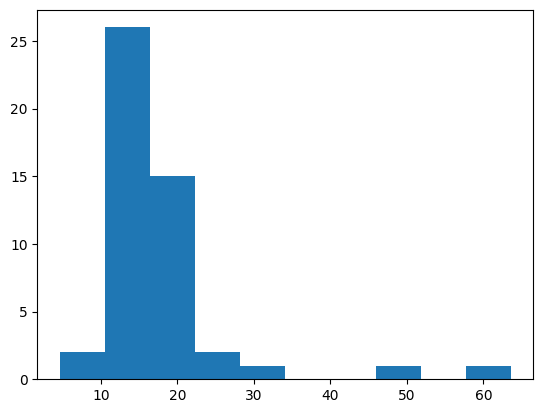

In [18]:
plt.hist(data)

Considering our data is concentrated on the lower end of the graph, a positively skewed distribution for our mean is best. Let's stick with the Gamma distribution, using $a=3$ and $B=1$ for our parameters. I chose these values because the Gamma distribution graph on the API with these parameters most closely resembles our histogram. For the standard deviation, let's use the HalfNormal distribution because all of our values are positive real numbers with a greater weight given toward the smaller values. We'll keep the sigma=5 parameter because its already given to us.

<Axes: >

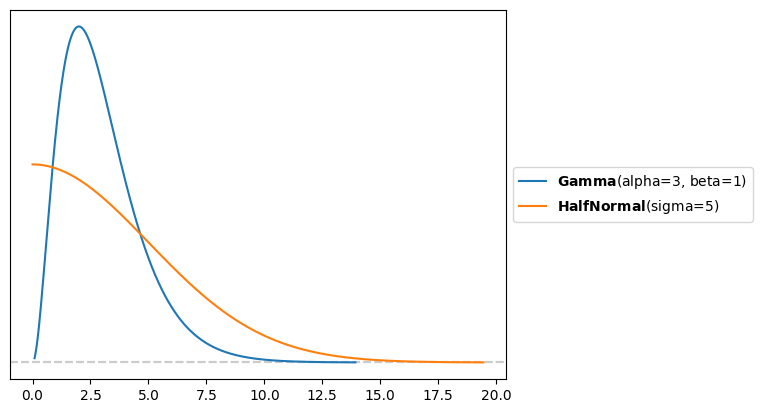

In [36]:
pz.Gamma(alpha=3, beta=1).plot_pdf()
pz.HalfNormal(sigma=5).plot_pdf()


### **Selecting the Likelihood**


My approach to finding the right Likelihood revolved around trying as many distributions as possible that fit the following requirements:
1. The distribution had to be positively skewed
2. The distribution had to be continuous
3. Non-negative
4. Shouldn't be similar to HalfNormal and HalfStudentT distributions that have limited flexibility and are generally more symmetric in nature

All that said, let's start finding potential likelihoods. The first one I was optimistic about was the LogNormal distribution since "it can be thought of as the multiplicative product of many small independent factors" (API). This is perfect for something like movie returns because so many factors determine their performance!

In [49]:
with pm.Model() as model_boxOffice:
    μ = pm.Gamma('μ',alpha=3, beta=1)
    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.LogNormal('Y', mu=μ, sigma=σ, observed=data)
    data_LogNormal=pm.sample()

Output()

Output()

In [51]:
pm.sample_posterior_predictive(data_LogNormal, model=model_boxOffice, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

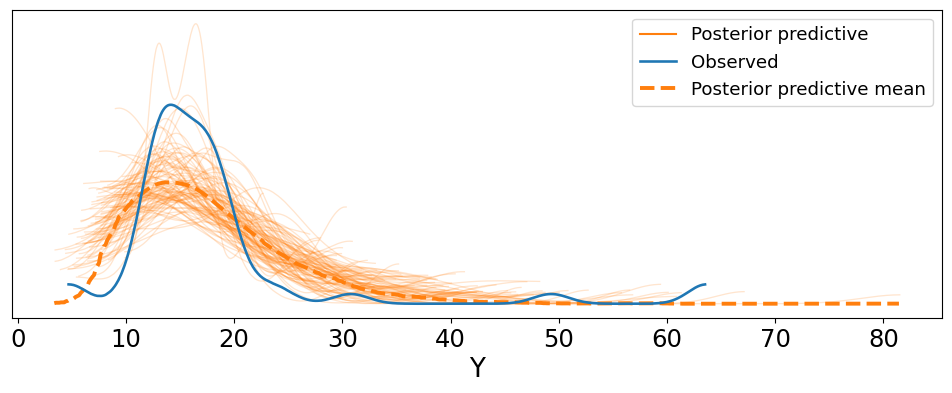

In [52]:
az.plot_ppc(data_LogNormal, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Well, I initially thought this distribution would be an extremely great fit for our data given its strengths, but its not too accurate. Don't get me wrong, it's a strong start.

I was inclined to try the ChiSquared distribution next, but after researching more about it, I realized that it wasn't the best fit. Even though the model is positively skewed and non-negative, it's one parameter limits the likelihood's flexibility. That's why I turned to the Gamma distribution, it does what the ChiSquared distribution does, but it's a lot more flexible.

In [53]:
with pm.Model() as model_boxOffice:

    μ = pm.Gamma('μ',alpha=3, beta=1)
    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.Gamma('Y', mu=μ, sigma=σ, observed=data)
    data_Gamma=pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(data_Gamma, model=model_boxOffice, extend_inferencedata=True)


<Axes: xlabel='Y'>

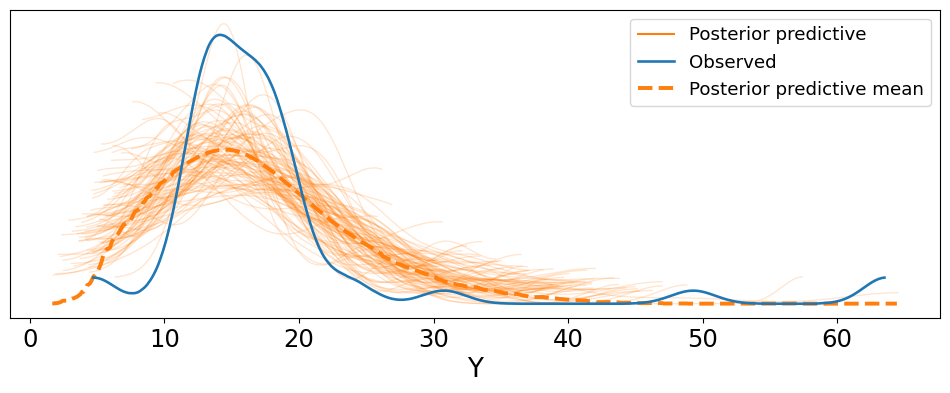

In [55]:
az.plot_ppc(data_Gamma, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Well, this looks like an exact copy of our LogNormal distribution, so might as well continue trying. Another likelihood we can try is the Rice distribution.

In [58]:
with pm.Model() as model_boxOffice:

    μ = pm.Gamma('μ',alpha=3, beta=1)
    σ = pm.HalfNormal('σ', sigma=5)
    x= pm.Uniform('x', lower=0, upper=5)

    Y = pm.Rice('Y', nu= x, sigma=σ, observed=data)
    data_Rice=pm.sample()

Output()

Output()

In [60]:
pm.sample_posterior_predictive(data_Rice, model=model_boxOffice, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

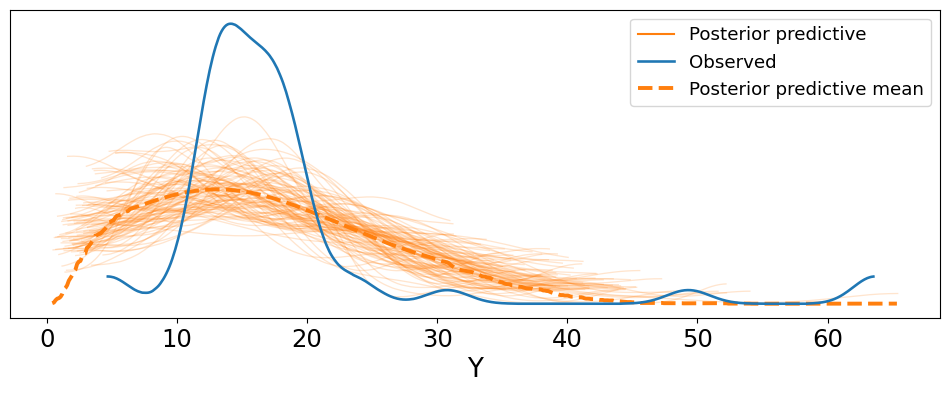

In [61]:
az.plot_ppc(data_Rice, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Huh. This doesn't look a lot better; it feels like we're making no progress. Let me try the InverseGamma distribution, it's similar to the Gamma distribution.

In [62]:
with pm.Model() as model_boxOffice:

    μ = pm.Gamma('μ',alpha=3, beta=1)
    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.InverseGamma('Y', mu= μ, sigma=σ, observed=data)
    data_InverseGamma=pm.sample()

Output()

Output()

In [63]:
pm.sample_posterior_predictive(data_InverseGamma, model=model_boxOffice, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='YC'>

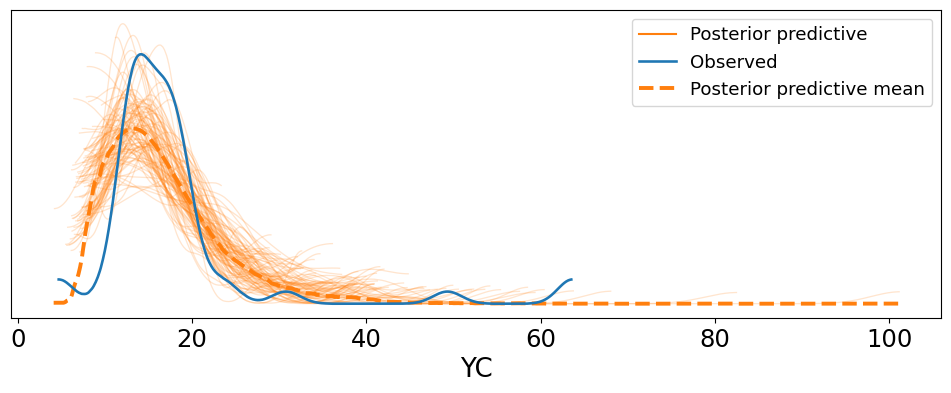

In [64]:
az.plot_ppc(data_InverseGamma, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Oh, that's the biggest improvement thus far! The distance from the peak has finally shrunk. I tried playing with the distribution more: changing out the priors to try to shrink the peak, but nothing really helped. Looking back, this makes sense because priors don't really have a strong hold on our liklihood.

For now, I think looking at one more distribution may be worth it before reaching a conclusion.

In [80]:
with pm.Model() as model_boxOffice:

    μ = pm.Gamma('μ',alpha=3, beta=1)
    σ = pm.HalfNormal('σ', sigma=5)

  #The values for alpha and Beta were found using the mean formula for the Weibull distribution and my data's mean of ~17.5
    a = pm.Exponential('a', 2)
    b = pm.Exponential('b', 19.74)

    Y = pm.Weibull('Y', alpha= a, beta=b, observed=data)
    data_Weibull=pm.sample()

Output()

Output()

In [81]:
pm.sample_posterior_predictive(data_Weibull, model=model_boxOffice, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

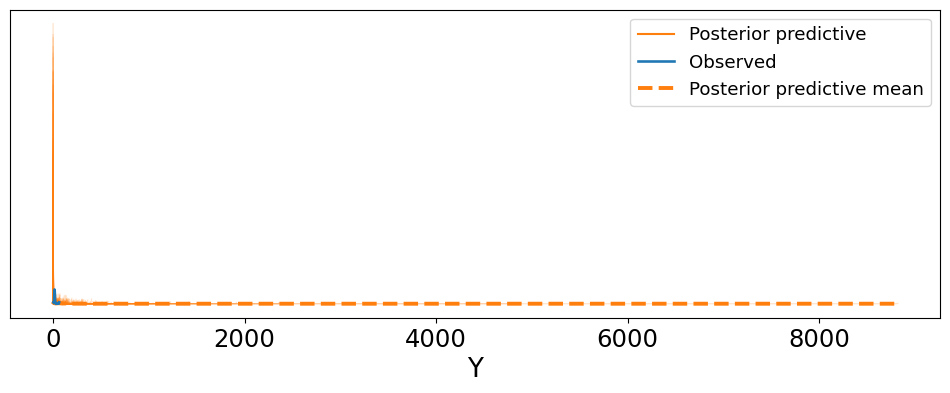

In [82]:
az.plot_ppc(data_Weibull, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Unfortunately, it looks like their was maybe some sort of scaling or parameter problem with our distribution. However, it was a good attempt.

### **Reflection**



After sifting through multiple likelihoods, the best one we found was the InverseGamma distribution. However, even this model had its flaws: the peak was too high, the graph was slightly shifted to the right, and the tail wasn't smooth.

Despite this, I do think that we can better model our data. Either it's the InverseGamma distribution and there's a way to modify it we haven't learned about, or there's an entirely new likelihood. I think this because Box Office Data, and financial returns in general, is something that statistical models are quite good at analyzing. For instance, even though the LogNormal distribution wasn't perfect, what it aimed to do was extremely useful in our context. It's ability to take into account multiple independent factors to reach a conclusion is definitely something useful in financial markets.

I think my biggest challenge in navigating the various likelihoods was managing the different parameters and understanding the role of each one in a given distribution. For example, the shift from working with alpha/Beta to degrees of freedom and other abrupt changes made it difficult to manange. Another challenge I had with the project was handling the data formatting errors. However, I was able to quickly tackle this because Python had a lot more premade functions to handle my niche issues than I had originally thought.

Ultimately, I'd like to revist this question later on because I do think that a likelihood exists to accurately model Box Office returns; we just might not have fully touched on it yet.
